In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [8]:
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes_dataset.shape

(768, 9)

In [10]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


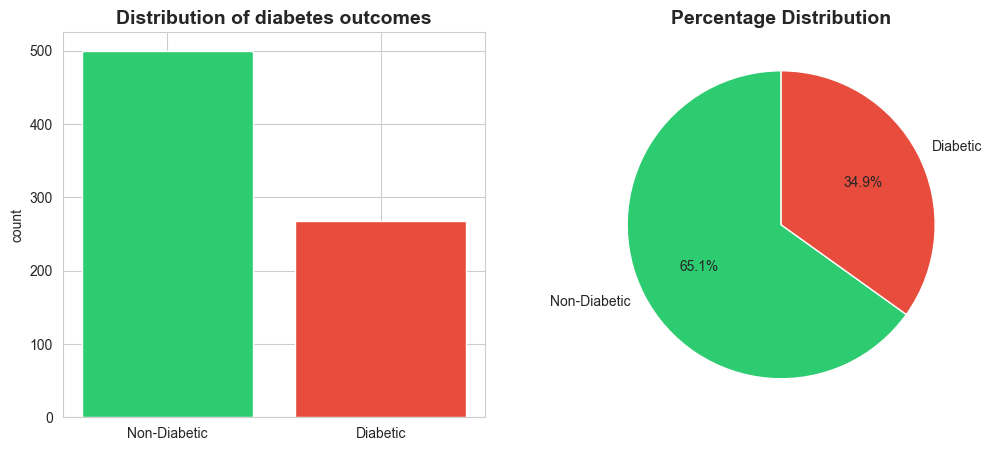

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
outcome_counts = diabetes_dataset['Outcome'].value_counts()
plt.bar(['Non-Diabetic', 'Diabetic'], outcome_counts.values, color=['#2ecc71','#e74c3c'])
plt.title('Distribution of diabetes outcomes', fontsize=14, fontweight='bold')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.pie(outcome_counts.values, labels=['Non-Diabetic', 'Diabetic'],
        autopct='%1.1f%%', colors=['#2ecc71','#e74c3c'], startangle=90)
plt.title('Percentage Distribution', fontsize=14, fontweight='bold')
plt.show()

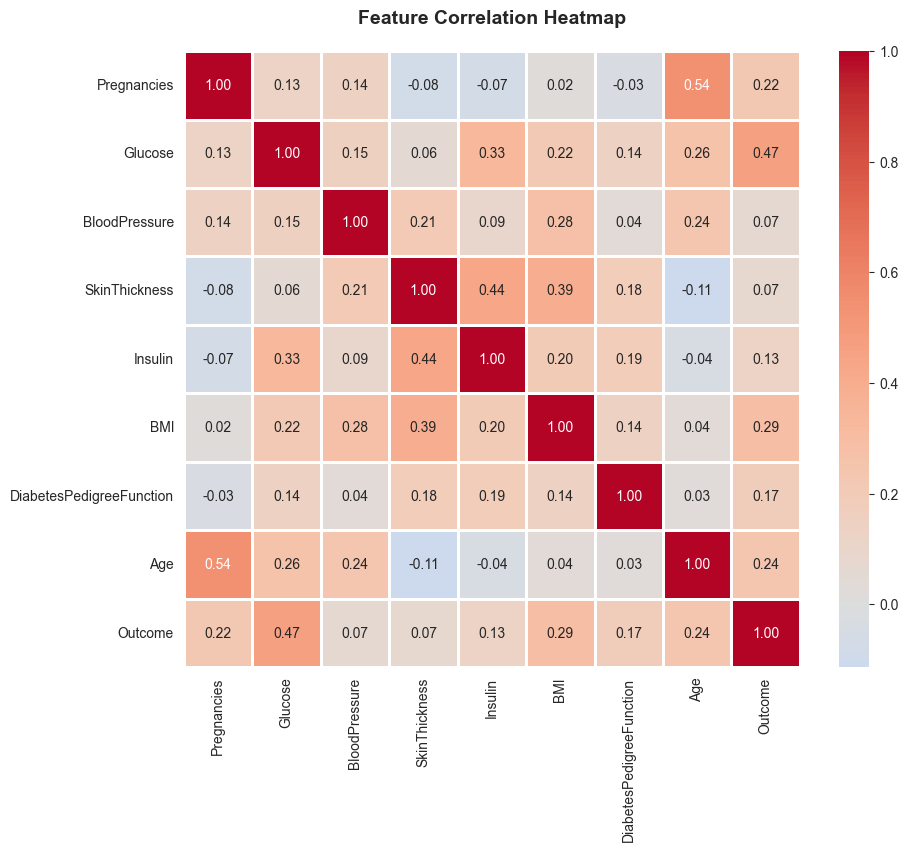

In [15]:
plt.figure(figsize=(10,8))
correlation = diabetes_dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True, linewidth=1, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, pad=20, fontweight='bold')
plt.show()

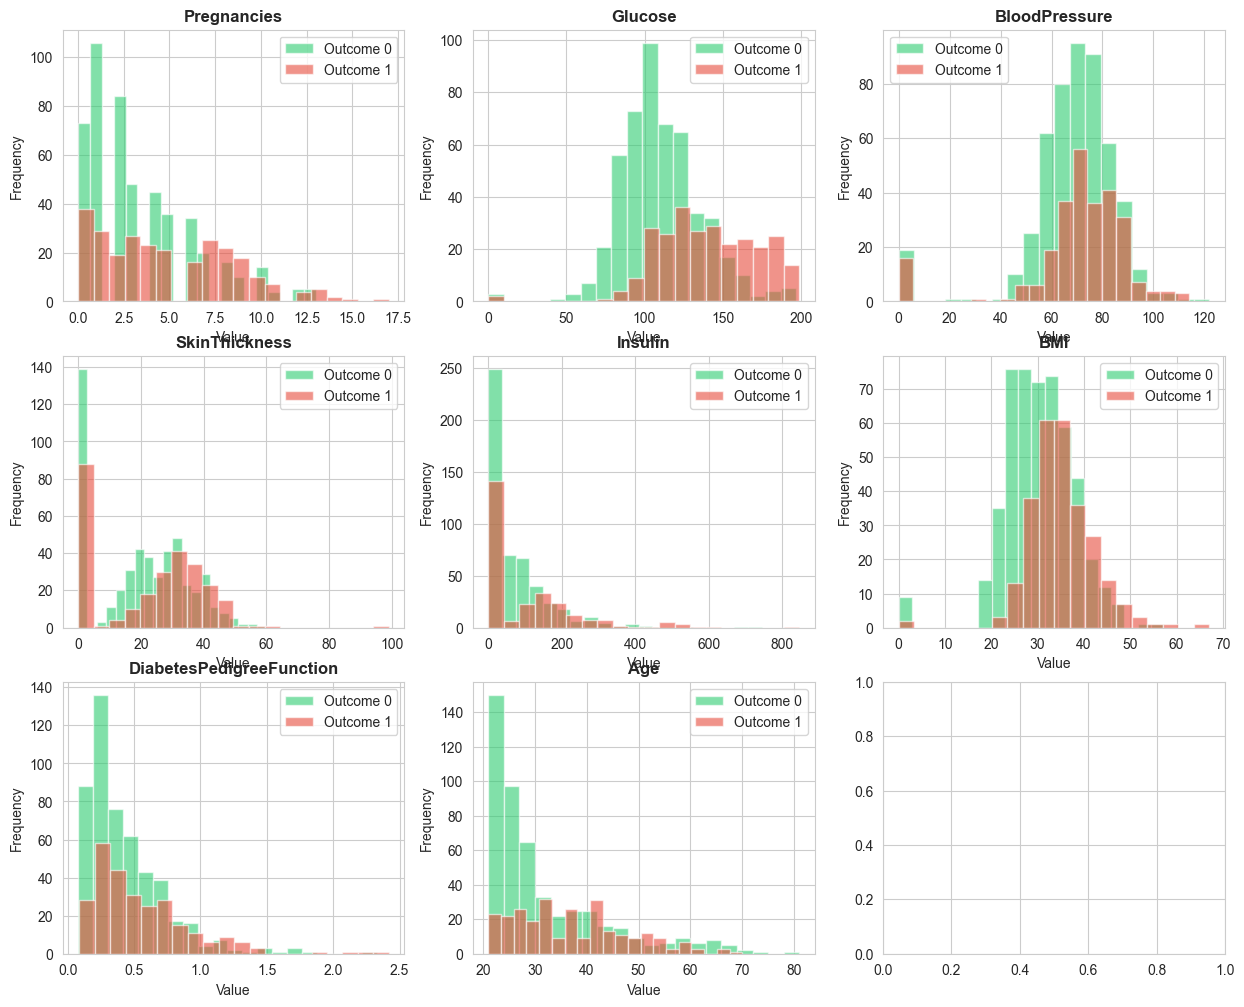

In [16]:
fig, axes = plt.subplots(3,3,figsize=(15,12))
features = diabetes_dataset.columns[:-1]

for idx, feature in enumerate(features):
    row, col = idx // 3, idx % 3
    for outcome in [0,1]:
        data = diabetes_dataset[diabetes_dataset['Outcome'] == outcome][feature]
        axes[row,col].hist(data, alpha=0.6, bins=20, label=f'Outcome {outcome}',
                           color=['#2ecc71', '#e74c3c'][outcome])
        axes[row,col].set_title(feature, fontweight='bold')
        axes[row,col].set_xlabel('Value')
        axes[row,col].set_ylabel('Frequency')
        axes[row,col].legend()
plt.show()